In [3]:
!pip install pyclustering

     |████████████████████████████████| 2.6MB 14.0MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp37-none-any.whl size=2395121 sha256=875ef45d9edfbed527a52378dafc33936dc0a4ae73d93bdf17661039a5f127df
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [1]:
!pip install tslearn

     |████████████████████████████████| 798kB 11.9MB/s 


In [4]:
import pandas as pd
#from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from pyclustering.cluster import kmedoids
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from math import sqrt
from sklearn.metrics.pairwise import cosine_similarity
from pprint import pprint

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#군집

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/데이터4/부산데이터_최종.xlsx')
#df.columns = ['dong', 'price']
df

,치안시설 수,행정동명,음식점,교육,상업시설,문화시설,지하철,유치원,초등학교,중학교,버스,병원,공원,고등학교,노인,구,읍/면/동,총인구수,0~19,20~39,40~64,65~,여,남,거래금액(만원)
0,34.0,가덕도동,107,2,24,0,0,1,1,1,49,4,2,1,3,강서구,가덕도동,3812,253,654,1769,1136,1810,2002,28635.186808
1,41.0,가락동,62,4,14,0,0,2,1,1,23,1,0,1,1,강서구,가락동,2406,119,380,977,930,1128,1278,28635.186808
2,8.0,가야동,486,97,83,1,2,2,4,2,31,32,1,1,5,부산진구,가야1동가야2동,36470,4469,9325,14676,8000,18470,18000,24982.026114
3,126.0,감만동,162,41,38,0,0,1,2,2,17,17,1,0,4,남구,감만1동감만2동,20468,2385,4160,8560,5363,10144,10324,17381.674185
4,87.0,감전동,322,27,83,0,1,3,2,0,44,15,0,0,4,사상구,감전동,13671,1194,3263,6171,3043,6425,7246,13166.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,NaN,부암동,273,96,59,0,0,0,0,0,0,0,0,0,0,부산진구,부암1동부암3동,40674,6847,9318,17239,7270,20747,19927,31636.565481
100,NaN,선두구동,57,2,13,0,0,0,1,0,4,1,2,0,0,금정구,선두구동,2368,173,420,1017,758,1100,1268,28635.186808
101,NaN,송정동,284,8,43,0,0,0,0,0,0,0,0,0,0,해운대구,송정동,9968,1016,2441,4096,2415,5146,4822,26786.243697
102,NaN,좌천동,58,11,27,0,0,0,0,0,0,0,0,0,0,동구,좌천동,10963,1057,2426,4361,3119,5633,5330,17258.154762


In [ ]:
df_c = pd.DataFrame(df['거래금액(만원)'])
df_c.columns=['price']
df_c

,price
0,28635.186808
1,28635.186808
2,24982.026114
3,17381.674185
4,13166.666667
...,...
99,31636.565481
100,28635.186808
101,26786.243697
102,17258.154762


In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')  
cluster.fit_predict(df_c)  

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

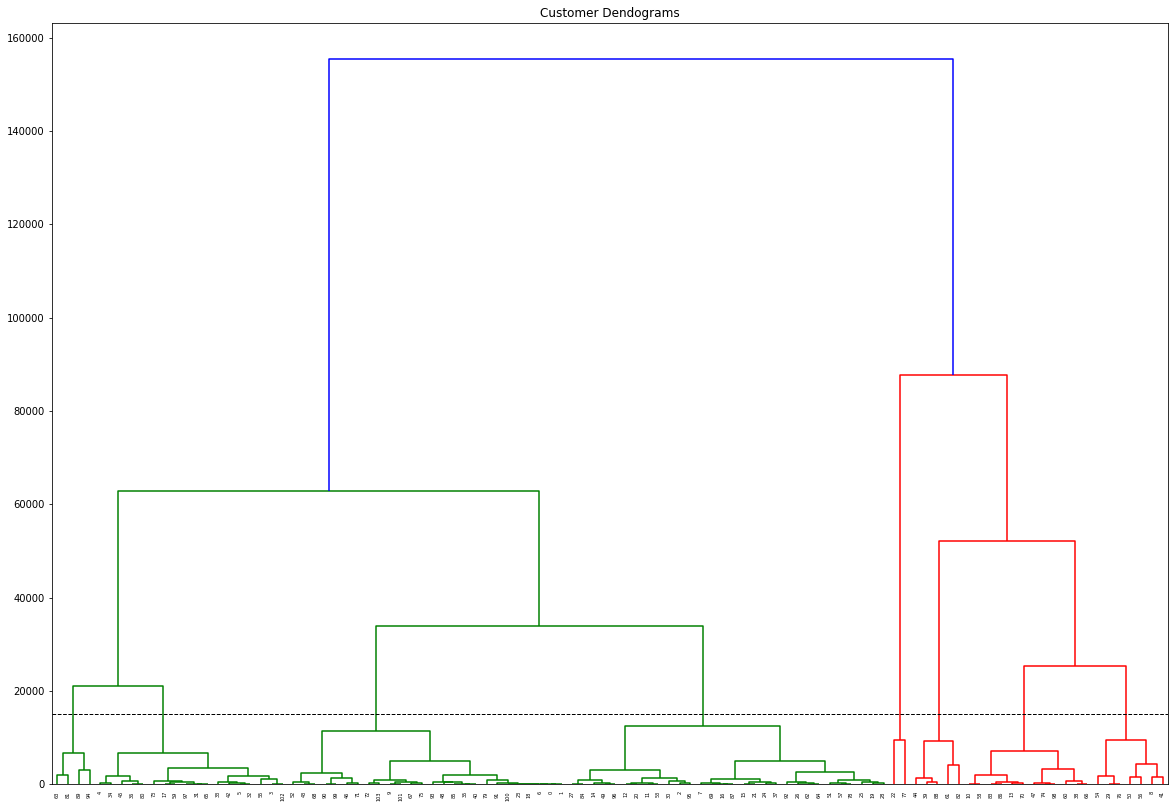

In [ ]:
plt.figure(figsize=(20, 14))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df_c, method='ward'))
plt.axhline(y=15000, color='k', linestyle='--', linewidth=1)

In [ ]:
kmeans = KMeans(n_clusters=8).fit(df_c)

kmeans.labels_

array([0, 0, 5, 2, 2, 2, 0, 5, 4, 0, 4, 5, 5, 4, 5, 5, 5, 2, 0, 5, 5, 5,
       1, 0, 5, 5, 5, 5, 5, 3, 0, 2, 2, 2, 2, 0, 2, 5, 4, 7, 0, 4, 2, 0,
       7, 2, 0, 4, 0, 5, 3, 5, 0, 5, 3, 2, 3, 5, 4, 2, 4, 7, 5, 6, 5, 2,
       4, 0, 0, 5, 4, 0, 0, 2, 4, 0, 3, 1, 5, 0, 2, 6, 3, 4, 5, 0, 4, 5,
       7, 6, 0, 0, 5, 0, 2, 5, 5, 2, 4, 0, 0, 0, 2, 0], dtype=int32)

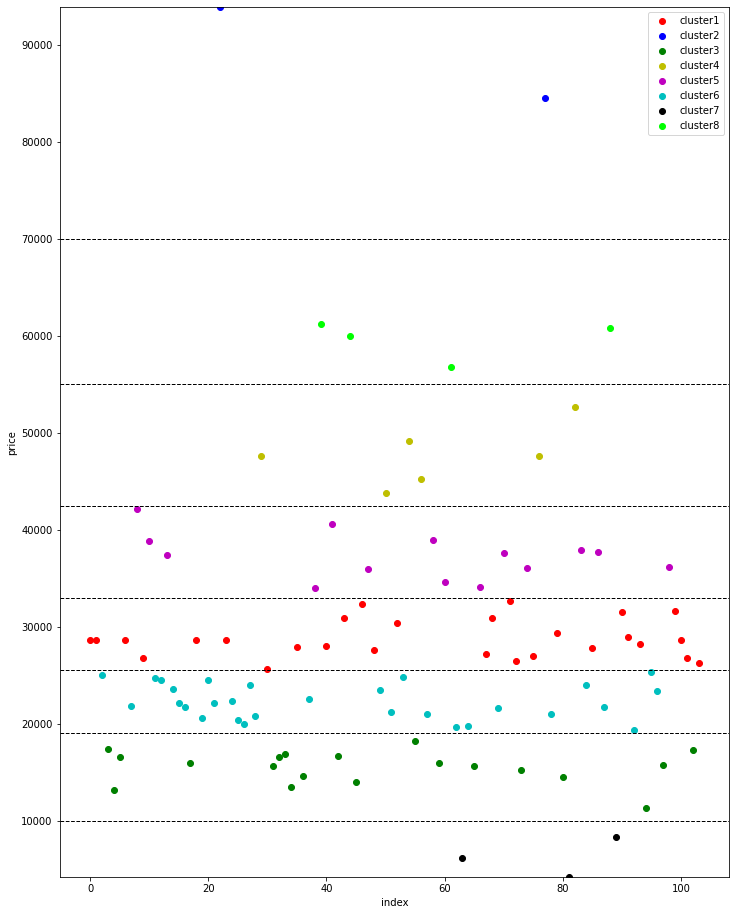

In [ ]:
list = df_c['price'].tolist()
index=range(len(df_c))

plt.figure(figsize=(12, 16))
plt.plot(df_c['price'][kmeans.labels_ == 0], 'ro', label = 'cluster1')
plt.plot(df_c['price'][kmeans.labels_ == 1], 'bo', label = 'cluster2')
plt.plot(df_c['price'][kmeans.labels_ == 2], 'go', label = 'cluster3')
plt.plot(df_c['price'][kmeans.labels_ == 3], 'yo', label = 'cluster4')
plt.plot(df_c['price'][kmeans.labels_ == 4], 'mo', label = 'cluster5')
plt.plot(df_c['price'][kmeans.labels_ == 5], 'co', label = 'cluster6')
plt.plot(df_c['price'][kmeans.labels_ == 6], 'ko', label = 'cluster7')
plt.plot(df_c['price'][kmeans.labels_ == 7], 'lime', marker='o',linestyle='', label = 'cluster8')
#plt.plot(df3['price'][kmeans.labels_ == 8], 'brown', marker='o',linestyle='', label = 'cluster9')
#plt.plot(df3['price'][kmeans.labels_ == 9], 'silver', marker='o',linestyle='', label = 'cluster10')
#plt.plot(df3['price'][kmeans.labels_ == 10], 'khaki', marker='o',linestyle='', label = 'cluster11')
#plt.plot(df3['price'][kmeans.labels_ == 11], 'teal', marker='o',linestyle='', label = 'cluster12')
#plt.plot(df3['price'][kmeans.labels_ == 12], 'pink', marker='o',linestyle='', label = 'cluster13')
#plt.plot(df3['price'][kmeans.labels_ == 13], 'purple', marker='o',linestyle='', label = 'cluster14')
#plt.plot(df3['price'][kmeans.labels_ == 14], 'fuchsia', marker='o',linestyle='', label = 'cluster15')
#plt.plot(df3['price'][kmeans.labels_ == 15], 'skyblue', marker='o',linestyle='', label = 'cluster16')

plt.xlabel('index')
plt.ylabel('price')
plt.ylim(np.min(list) - 1, np.max(list) + 1)

plt.axhline(y=10000, color='k', linestyle='--', linewidth=1)
plt.axhline(y=19000, color='k', linestyle='--', linewidth=1)
plt.axhline(y=25500, color='k', linestyle='--', linewidth=1)
plt.axhline(y=33000, color='k', linestyle='--', linewidth=1)
plt.axhline(y=42500, color='k', linestyle='--', linewidth=1)
plt.axhline(y=55000, color='k', linestyle='--', linewidth=1)
plt.axhline(y=70000, color='k', linestyle='--', linewidth=1)

plt.legend()

In [ ]:
df['label'] = kmeans.labels_

In [ ]:
df

,치안시설 수,행정동명,음식점,교육,상업시설,문화시설,지하철,유치원,초등학교,중학교,버스,병원,공원,고등학교,노인,구,읍/면/동,총인구수,0~19,20~39,40~64,65~,여,남,거래금액(만원),label
0,34.0,가덕도동,107,2,24,0,0,1,1,1,49,4,2,1,3,강서구,가덕도동,3812,253,654,1769,1136,1810,2002,28635.186808,0
1,41.0,가락동,62,4,14,0,0,2,1,1,23,1,0,1,1,강서구,가락동,2406,119,380,977,930,1128,1278,28635.186808,0
2,8.0,가야동,486,97,83,1,2,2,4,2,31,32,1,1,5,부산진구,가야1동가야2동,36470,4469,9325,14676,8000,18470,18000,24982.026114,5
3,126.0,감만동,162,41,38,0,0,1,2,2,17,17,1,0,4,남구,감만1동감만2동,20468,2385,4160,8560,5363,10144,10324,17381.674185,2
4,87.0,감전동,322,27,83,0,1,3,2,0,44,15,0,0,4,사상구,감전동,13671,1194,3263,6171,3043,6425,7246,13166.666667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.0,부암동,273,96,59,0,0,0,0,0,0,0,0,0,0,부산진구,부암1동부암3동,40674,6847,9318,17239,7270,20747,19927,31636.565481,0
100,0.0,선두구동,57,2,13,0,0,0,1,0,4,1,2,0,0,금정구,선두구동,2368,173,420,1017,758,1100,1268,28635.186808,0
101,0.0,송정동,284,8,43,0,0,0,0,0,0,0,0,0,0,해운대구,송정동,9968,1016,2441,4096,2415,5146,4822,26786.243697,0
102,0.0,좌천동,58,11,27,0,0,0,0,0,0,0,0,0,0,동구,좌천동,10963,1057,2426,4361,3119,5633,5330,17258.154762,2


In [ ]:
df = df.fillna(0)

In [ ]:
writer = pd.ExcelWriter('/content/drive/MyDrive/데이터4/부산데이터_레이블링_8.xlsx', options={'string_to_urls':False})
df.to_excel(writer, index=False)
writer.save()

#추천

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/데이터4/부산데이터_레이블링_8.xlsx')
#df.columns = ['dong', 'price']
df = df[[ '행정동명', '치안시설 수', '음식점', '교육', '상업시설', '문화시설', '지하철', '유치원', '초등학교', '중학교', '버스',
       '병원', '공원', '고등학교', '노인', '총인구수', '0~19', '20~39', '40~64', '65~', '여', '남', '구', '읍/면/동', '거래금액(만원)', 'label']]
df

,행정동명,치안시설 수,음식점,교육,상업시설,문화시설,지하철,유치원,초등학교,중학교,버스,병원,공원,고등학교,노인,총인구수,0~19,20~39,40~64,65~,여,남,구,읍/면/동,거래금액(만원),label
0,가덕도동,34,107,2,24,0,0,1,1,1,49,4,2,1,3,3812,253,654,1769,1136,1810,2002,강서구,가덕도동,28635.186808,1
1,가락동,41,62,4,14,0,0,2,1,1,23,1,0,1,1,2406,119,380,977,930,1128,1278,강서구,가락동,28635.186808,1
2,가야동,8,486,97,83,1,2,2,4,2,31,32,1,1,5,36470,4469,9325,14676,8000,18470,18000,부산진구,가야1동가야2동,24982.026114,4
3,감만동,126,162,41,38,0,0,1,2,2,17,17,1,0,4,20468,2385,4160,8560,5363,10144,10324,남구,감만1동감만2동,17381.674185,0
4,감전동,87,322,27,83,0,1,3,2,0,44,15,0,0,4,13671,1194,3263,6171,3043,6425,7246,사상구,감전동,13166.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,부암동,0,273,96,59,0,0,0,0,0,0,0,0,0,0,40674,6847,9318,17239,7270,20747,19927,부산진구,부암1동부암3동,31636.565481,1
100,선두구동,0,57,2,13,0,0,0,1,0,4,1,2,0,0,2368,173,420,1017,758,1100,1268,금정구,선두구동,28635.186808,1
101,송정동,0,284,8,43,0,0,0,0,0,0,0,0,0,0,9968,1016,2441,4096,2415,5146,4822,해운대구,송정동,26786.243697,1
102,좌천동,0,58,11,27,0,0,0,0,0,0,0,0,0,0,10963,1057,2426,4361,3119,5633,5330,동구,좌천동,17258.154762,0


In [ ]:
# 정규화(최소-최대 정규화)
from sklearn.preprocessing import minmax_scale
df.iloc[:, 1:15] = minmax_scale(df.iloc[:, 1:15]) ## 데이터 열 기준으로 최소-최대 정규화 진행

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   행정동명      104 non-null    object 
 1   치안시설 수    104 non-null    float64
 2   음식점       104 non-null    float64
 3   교육        104 non-null    float64
 4   상업시설      104 non-null    float64
 5   문화시설      104 non-null    float64
 6   지하철       104 non-null    float64
 7   유치원       104 non-null    float64
 8   초등학교      104 non-null    float64
 9   중학교       104 non-null    float64
 10  버스        104 non-null    float64
 11  병원        104 non-null    float64
 12  공원        104 non-null    float64
 13  고등학교      104 non-null    float64
 14  노인        104 non-null    float64
 15  총인구수      104 non-null    int64  
 16  0~19      104 non-null    int64  
 17  20~39     104 non-null    int64  
 18  40~64     104 non-null    int64  
 19  65~       104 non-null    int64  
 20  여         104 non-null    int64 

In [ ]:
df2 = df.drop(['구', '읍/면/동','거래금액(만원)', '0~19', '20~39', '40~64', '65~', '총인구수', '여', '남', '행정동명'], axis=1)
df3 = df.drop(['구', '읍/면/동','거래금액(만원)', '0~19', '20~39', '40~64', '65~', '총인구수', '여', '남'], axis=1)

In [ ]:
df2

,치안시설 수,음식점,교육,상업시설,문화시설,지하철,유치원,초등학교,중학교,버스,병원,공원,고등학교,노인,label
0,0.081731,0.039548,0.001529,0.044444,0.000000,0.000000,0.0625,0.090909,0.166667,0.125964,0.011594,0.2,0.5,0.068182,1
1,0.098558,0.021388,0.004587,0.019753,0.000000,0.000000,0.1250,0.090909,0.166667,0.059126,0.002899,0.0,0.5,0.022727,1
2,0.019231,0.192494,0.146789,0.190123,0.076923,0.333333,0.1250,0.363636,0.333333,0.079692,0.092754,0.1,0.5,0.113636,4
3,0.302885,0.061743,0.061162,0.079012,0.000000,0.000000,0.0625,0.181818,0.333333,0.043702,0.049275,0.1,0.0,0.090909,0
4,0.209135,0.126312,0.039755,0.190123,0.000000,0.166667,0.1875,0.181818,0.000000,0.113111,0.043478,0.0,0.0,0.090909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.000000,0.106538,0.145260,0.130864,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1
100,0.000000,0.019370,0.001529,0.017284,0.000000,0.000000,0.0000,0.090909,0.000000,0.010283,0.002899,0.2,0.0,0.000000,1
101,0.000000,0.110977,0.010703,0.091358,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1
102,0.000000,0.019774,0.015291,0.051852,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0


#유사한 동 추천

In [ ]:
df0 = df3.copy()

In [ ]:
labels = [6,5,4,3,2,1]
group_df = pd.DataFrame(labels,columns=['label'])

In [ ]:
columns = ['치안시설 수', '음식점', '상업시설', '병원', '노인']
for col in columns:
    col_name = col+'_그룹'
    df0[col_name]=pd.cut(df0[col],6,labels=labels)
    print('\n',col_name,df0[col_name].value_counts())
    print(df0[col].groupby(df0[col_name]).mean())
    group_df[col] = df0[col].groupby(df0[col_name]).mean().values


 치안시설 수_그룹 6    53
5    30
4    11
3     5
2     3
1     2
Name: 치안시설 수_그룹, dtype: int64
치안시설 수_그룹
6    0.075154
5    0.233494
4    0.422858
3    0.574519
2    0.721955
1    0.979567
Name: 치안시설 수, dtype: float64

 음식점_그룹 6    56
5    34
4     7
2     3
3     3
1     1
Name: 음식점_그룹, dtype: int64
음식점_그룹
6    0.084530
5    0.238546
4    0.392944
3    0.537261
2    0.730697
1    1.000000
Name: 음식점, dtype: float64

 상업시설_그룹 6    56
5    35
4     8
1     2
3     2
2     1
Name: 상업시설_그룹, dtype: int64
상업시설_그룹
6    0.077778
5    0.222716
4    0.398765
3    0.586420
2    0.785185
1    0.965432
Name: 상업시설, dtype: float64

 병원_그룹 6    73
5    24
4     4
1     1
2     1
3     1
Name: 병원_그룹, dtype: int64
병원_그룹
6    0.066468
5    0.231401
4    0.429710
3    0.576812
2    0.747826
1    1.000000
Name: 병원, dtype: float64

 노인_그룹 6    73
5    23
4     4
3     2
1     1
2     1
Name: 노인_그룹, dtype: int64
노인_그룹
6    0.066936
5    0.226285
4    0.392045
3    0.659091
2    0.818182
1    1.000000
Name: 노인, dt

In [ ]:
columns = ['교육','버스']
for col in columns:
    col_name = col+'_그룹'
    df0[col_name]=pd.qcut(df0[col],6,labels=labels)
    print('\n',col_name,df0[col_name].value_counts())
    print(df0[col].groupby(df0[col_name]).mean())
    group_df[col] = df0[col].groupby(df0[col_name]).mean().values


 교육_그룹 1    18
6    18
2    17
3    17
4    17
5    17
Name: 교육_그룹, dtype: int64
교육_그룹
6    0.007136
5    0.028512
4    0.065839
3    0.118457
2    0.199316
1    0.398658
Name: 교육, dtype: float64

 버스_그룹 5    19
1    18
6    18
2    17
3    17
4    15
Name: 버스_그룹, dtype: int64
버스_그룹
6    0.018995
5    0.057367
4    0.082262
3    0.108574
2    0.145471
1    0.311482
Name: 버스, dtype: float64


In [ ]:
group_df.set_index(['label'],inplace=True)

In [ ]:
labels = ['중요하다','있어야 한다','없어도 된다']
group_df2 = pd.DataFrame(labels,columns=['label'])
columns = ['문화시설', '지하철', '유치원', '초등학교', '중학교','공원', '고등학교']
for col in columns:
    group_df2[col] = [df0[col].max(),
                      df0[col].quantile(.75),
                      0]

In [ ]:
group_df2.set_index(['label'],inplace=True)

In [ ]:
group_df

,치안시설 수,음식점,상업시설,병원,노인,교육,버스
label,,,,,,,
6,0.075154,0.084530,0.077778,0.066468,0.066936,0.007136,0.018995
5,0.233494,0.238546,0.222716,0.231401,0.226285,0.028512,0.057367
4,0.422858,0.392944,0.398765,0.429710,0.392045,0.065839,0.082262
3,0.574519,0.537261,0.586420,0.576812,0.659091,0.118457,0.108574
2,0.721955,0.730697,0.785185,0.747826,0.818182,0.199316,0.145471
1,0.979567,1.000000,0.965432,1.000000,1.000000,0.398658,0.311482


In [ ]:
group_df2

,문화시설,지하철,유치원,초등학교,중학교,공원,고등학교
label,,,,,,,
중요하다,1.000000,1.000000,1.000,1.000000,1.0,1.0,1.0
있어야 한다,0.076923,0.333333,0.375,0.363636,0.5,0.1,0.5
없어도 된다,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0


In [ ]:
df0 = df0[['치안시설 수',	'음식점',	'교육',	'상업시설',	'문화시설',	'지하철',	'유치원',	'초등학교',	'중학교',	
               '버스',	'병원',	'공원',	'고등학교',	'노인', 'label', '행정동명']]

In [ ]:
df0

,치안시설 수,음식점,교육,상업시설,문화시설,지하철,유치원,초등학교,중학교,버스,병원,공원,고등학교,노인,label,행정동명
0,0.081731,0.039548,0.001529,0.044444,0.000000,0.000000,0.0625,0.090909,0.166667,0.125964,0.011594,0.2,0.5,0.068182,1,가덕도동
1,0.098558,0.021388,0.004587,0.019753,0.000000,0.000000,0.1250,0.090909,0.166667,0.059126,0.002899,0.0,0.5,0.022727,1,가락동
2,0.019231,0.192494,0.146789,0.190123,0.076923,0.333333,0.1250,0.363636,0.333333,0.079692,0.092754,0.1,0.5,0.113636,4,가야동
3,0.302885,0.061743,0.061162,0.079012,0.000000,0.000000,0.0625,0.181818,0.333333,0.043702,0.049275,0.1,0.0,0.090909,0,감만동
4,0.209135,0.126312,0.039755,0.190123,0.000000,0.166667,0.1875,0.181818,0.000000,0.113111,0.043478,0.0,0.0,0.090909,0,감전동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.000000,0.106538,0.145260,0.130864,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,부암동
100,0.000000,0.019370,0.001529,0.017284,0.000000,0.000000,0.0000,0.090909,0.000000,0.010283,0.002899,0.2,0.0,0.000000,1,선두구동
101,0.000000,0.110977,0.010703,0.091358,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,송정동
102,0.000000,0.019774,0.015291,0.051852,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,좌천동


In [ ]:
def find_similar_dong(df):
    

    df0.append(pd.Series(name='가상의동'))
    # 가상의 동 만들기 
    print('치안시설 수/음식점/교육/상업시설/병원/노인/버스에 대해 중요도를 1~6중 하나로 입력')
    print('예시 : 노인',1)

    for col in group_df.columns:
        importance = int(input(col + ': '))
        df0.loc['가상의동',col] = group_df.loc[importance,col]

        
    print('\n중요하다-2/있어야 한다-1/없어도 된다-0')
    for col in group_df2.columns:
        importance = int(input(col + ': '))
        if importance == 2:
          importance = '중요하다'
        elif importance == 1:
          importance = '있어야 한다'
        elif importance == 0:
          importance = '없어도 된다'
        df0.loc['가상의동',col] = group_df2.loc[importance,col]
    
    #dong_sim = cosine_similarity(df0,df0)
    
    # cosine_similarity()로 반환된 넘파이 행렬을 동명을 매핑해 DataFrame으로 변환
    #dong_sim_df = pd.DataFrame(data=dong_sim, index=df.index, columns = df.index)
    
    #print('\n',dong_sim_df['가상의동'].sort_values(ascending=False)[1:6])


In [ ]:
#find_similar_dong(df0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


치안시설 수/음식점/교육/상업시설/병원/노인/버스에 대해 중요도를 1~6중 하나로 입력
예시 : 노인 1
치안시설 수: 1
음식점: 2
상업시설: 3
병원: 4
노인: 5
교육: 6
버스: 1

중요하다-2/있어야 한다-1/없어도 된다-0
문화시설: 0
지하철: 1
유치원: 2
초등학교: 0
중학교: 1
공원: 2
고등학교: 1


In [ ]:
#col = df3['행정동명'].tolist()
#col.append('가상의동')
#df0['행정동명'] = col

In [ ]:
#df0

,치안시설 수,음식점,교육,상업시설,문화시설,지하철,유치원,초등학교,중학교,버스,병원,공원,고등학교,노인,행정동명
0,0.081731,0.039548,0.001529,0.044444,0.000000,0.000000,0.0625,0.090909,0.166667,0.125964,0.011594,0.2,0.5,0.068182,가덕도동
1,0.098558,0.021388,0.004587,0.019753,0.000000,0.000000,0.1250,0.090909,0.166667,0.059126,0.002899,0.0,0.5,0.022727,가락동
2,0.019231,0.192494,0.146789,0.190123,0.076923,0.333333,0.1250,0.363636,0.333333,0.079692,0.092754,0.1,0.5,0.113636,가야동
3,0.302885,0.061743,0.061162,0.079012,0.000000,0.000000,0.0625,0.181818,0.333333,0.043702,0.049275,0.1,0.0,0.090909,감만동
4,0.209135,0.126312,0.039755,0.190123,0.000000,0.166667,0.1875,0.181818,0.000000,0.113111,0.043478,0.0,0.0,0.090909,감전동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.000000,0.019370,0.001529,0.017284,0.000000,0.000000,0.0000,0.090909,0.000000,0.010283,0.002899,0.2,0.0,0.000000,선두구동
101,0.000000,0.110977,0.010703,0.091358,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,송정동
102,0.000000,0.019774,0.015291,0.051852,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,좌천동
103,0.000000,0.131558,0.058104,0.120988,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,초읍동


#추천시스템

In [ ]:

# calculate the Euclidean distance between two vectors
# row = [x, y, type]
def euclidean_distance(row1, row2, leng):
	distance = 0.0
	for i in range(leng-1):
		distance += (row1.iloc[i, 0] - row2.iloc[i])**2
	return sqrt(distance)

In [ ]:
#row0 = pd.DataFrame(df0.loc['가상의동'])

In [ ]:
#for row in range(len(df0)-1):
	#distance = euclidean_distance(row0, df0.loc[row])
	#print(distance)

1.8871123959034157
1.9707393033612295
1.8193323221606692
1.8738719114025288
1.8827659855379382
1.700546923709869
2.084280818111974
1.6849637903051138
1.5900568871494174
1.8950262909940279
1.3369898558465385
1.8621223198424575
1.4076921162074723
1.7521988447691863
2.0816119052206483
1.33070505463653
1.6485427037503662
1.9630788592989747
2.177012638232402
1.2922650381570706
1.8837150691165245
1.7938653910977562
1.7045871393734793
1.9858198497679533
1.9650702678558674
1.4730317602185428
1.5046346134792306
1.691828072229247
1.7560408358459112
1.583186680413405
1.5854677808974547
1.9575928600726429
1.594445208760959
1.7374236902065239
2.0907057059469634
1.9214032820563265
1.610175205469595
1.6074816122806799
1.6334847467158575
1.7123466772053129
1.696958863010001
1.4966954765813767
1.7438295138077242
1.4443214464258989
1.774256356842324
1.6964515060771388
1.7090634398603612
1.4797923279072756
1.9086759671538827
1.9195701769312317
1.7954098969320706
2.049752677728664
1.6841344854244154
2.032

In [ ]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors, leng):
	distances = []
	for train_row in range(len(train)-1):
		dist = euclidean_distance(test_row, train.loc[train_row], leng)
		distances.append((train.loc[train_row], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = []
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [ ]:
#neighbors = get_neighbors(df0, row0, 3)
#for neighbor in neighbors:
	#print(neighbor[14])

기장읍
구포동
광안동


#cfr

In [ ]:
df_1 = pd.DataFrame(df['0~19'])
df_1['userid'] = 1
df_2 = pd.DataFrame(df['20~39'])
df_2['userid'] = 2
df_3 = pd.DataFrame(df['40~64'])
df_3['userid'] = 3
df_4 = pd.DataFrame(df['65~'])
df_4['userid'] = 4

df_1.columns = ['rating', 'userid']
df_2.columns = ['rating', 'userid']
df_3.columns = ['rating', 'userid']
df_4.columns = ['rating', 'userid']

In [ ]:
df_1 = pd.concat([df3,df_1],axis=1)
df_2 = pd.concat([df3,df_2],axis=1)
df_3 = pd.concat([df3,df_3],axis=1)
df_4 = pd.concat([df3,df_4],axis=1)

In [ ]:
dfdf = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
dfdf

,행정동명,치안시설 수,음식점,교육,상업시설,문화시설,지하철,유치원,초등학교,중학교,버스,병원,공원,고등학교,노인,rating,userid
0,가덕도동,0.081731,0.039548,0.001529,0.044444,0.000000,0.000000,0.0625,0.090909,0.166667,0.125964,0.011594,0.2,0.5,0.068182,253,1
1,가락동,0.098558,0.021388,0.004587,0.019753,0.000000,0.000000,0.1250,0.090909,0.166667,0.059126,0.002899,0.0,0.5,0.022727,119,1
2,가야동,0.019231,0.192494,0.146789,0.190123,0.076923,0.333333,0.1250,0.363636,0.333333,0.079692,0.092754,0.1,0.5,0.113636,4469,1
3,감만동,0.302885,0.061743,0.061162,0.079012,0.000000,0.000000,0.0625,0.181818,0.333333,0.043702,0.049275,0.1,0.0,0.090909,2385,1
4,감전동,0.209135,0.126312,0.039755,0.190123,0.000000,0.166667,0.1875,0.181818,0.000000,0.113111,0.043478,0.0,0.0,0.090909,1194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,부암동,0.000000,0.106538,0.145260,0.130864,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,7270,4
412,선두구동,0.000000,0.019370,0.001529,0.017284,0.000000,0.000000,0.0000,0.090909,0.000000,0.010283,0.002899,0.2,0.0,0.000000,758,4
413,송정동,0.000000,0.110977,0.010703,0.091358,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2415,4
414,좌천동,0.000000,0.019774,0.015291,0.051852,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,3119,4


In [ ]:
item_user_rating = dfdf.pivot_table('rating', index = '행정동명', columns='userid')
# 열을 유저아이디로 무비, 유저 레이팅
user_item_rating = dfdf.pivot_table('rating', index = 'userid', columns='행정동명')
# 열을 타이틀로 유저, 무비 레이팅

In [ ]:
user_item_rating.head(5)

행정동명,가덕도동,가락동,가야동,감만동,감전동,감천동,강동동,개금동,거제동,광복동,광안동,괘법동,괴정동,구서동,구평동,구포동,금곡동,금사회동동,금성동,기장읍,남부민동,남산동,남천동,남포동,남항동,녹산동,다대동,당감동,당리동,대연동,대저동,대청동,덕천동,덕포동,동광동,동대신동,동삼동,만덕동,망미동,명륜동,...,수영동,수정동,신선동,신평동,아미동,안락동,암남동,양정동,엄궁동,연산동,연지동,영선동,영주동,온천동,용당동,용호동,우동,우암동,일광면,장림동,장안읍,장전동,재송동,전포동,정관읍,좌동,좌천동,주례동,중동,중앙동,철마면,청룡노포동,청학동,초량동,초읍동,초장동,충무동,하단동,학장동,화명동
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,253,119,4469,2385,1194,2700,210,7973,11606,55,7602,2126,7536,8766,2118,7008,5241,612,187,7491,1151,3253,3958,45,948,6793,11058,6104,3886,15119,1425,576,3094,2759,175,2266,4899,8970,5092,5892,...,1248,2281,670,4690,391,6413,1586,3830,4824,19132,3298,1354,1067,9909,1276,14248,14874,1528,4987,6285,825,7254,12219,4835,22611,15812,1057,7116,6998,106,805,1192,3216,3280,2865,288,1011,6286,4111,17170
2,654,380,9325,4160,3263,5012,699,15715,13413,224,21830,7413,13329,12647,3342,15657,8321,1610,160,11822,2516,7482,6113,152,2124,10192,14848,10762,6469,27561,2919,1600,8889,5180,529,4470,8905,14814,9026,5546,...,3589,4942,1407,8325,1286,9668,2932,10570,6886,38928,4432,2512,2868,20291,1839,16991,19510,2526,7071,9706,2064,14866,14872,15484,19633,23347,2426,14268,10658,1107,1388,2001,4911,7734,4696,770,2574,14682,6804,22257
3,1769,977,14676,8560,6171,10921,1978,23207,25860,435,24712,9118,24128,22501,4554,26803,16713,3577,450,22169,6015,12098,10877,478,4551,12692,29258,19045,11221,35098,5536,2636,14743,9686,1169,7655,17363,24502,15517,10240,...,5718,9314,3624,14278,2784,17830,5350,12587,12298,57628,8601,5135,4781,29154,3451,34964,34493,5418,9482,16455,3412,15867,26728,15143,30749,37429,4361,21738,18250,835,3343,3988,10231,11003,8888,1882,3949,18275,12710,37682
4,1136,930,8000,5363,3043,6661,1463,10574,11906,344,13391,3540,14087,9736,1602,11263,8541,2294,274,11212,4684,6522,5343,322,3307,3784,12214,9412,5319,16117,3830,1641,8620,4247,959,5260,11061,10695,9371,3262,...,4303,7184,3060,5987,2391,8558,3234,6098,3681,28946,4560,3706,3319,14216,1669,16749,13910,3626,3543,6389,2282,7192,9495,7857,8693,13468,3119,8985,6870,458,2474,2726,6317,6653,5805,1563,2419,7681,5177,10868


In [ ]:
item_user_rating.head()
# 유저끼리 얼마나 가깝냐
# 각 유저들이 점수 준데에만 값이 들어감
# 아무도 평점을 안메기면 동작x, 비어있는 데이터 많다
# 영화 거의 만개에서 자기가 점수 준거만

userid,1,2,3,4
행정동명,,,,
가덕도동,253,654,1769,1136
가락동,119,380,977,930
가야동,4469,9325,14676,8000
감만동,2385,4160,8560,5363
감전동,1194,3263,6171,3043


In [ ]:
item_user_rating.fillna(0, inplace = True) # NAN->0

In [ ]:
item_user_rating = item_user_rating.reset_index()
item_user_rating['행정동명'] = df['행정동명']
item_user_rating['label'] = df['label']
item_user_rating

userid,행정동명,1,2,3,4,label
0,가덕도동,253,654,1769,1136,1
1,가락동,119,380,977,930,1
2,가야동,4469,9325,14676,8000,4
3,감만동,2385,4160,8560,5363,0
4,감전동,1194,3263,6171,3043,0
...,...,...,...,...,...,...
99,부암동,288,770,1882,1563,1
100,선두구동,1011,2574,3949,2419,1
101,송정동,6286,14682,18275,7681,1
102,좌천동,4111,6804,12710,5177,0


In [ ]:
# 아이템 기반, 코사인 유사도

#item_based_collabor = cosine_similarity(item_user_rating)
#item_based_collabor

In [ ]:
#print(item_user_rating.shape)
#print(item_based_collabor.shape)

(104, 4)
(104, 104)


In [ ]:
#item_based_collabor = pd.DataFrame(data = item_based_collabor, index = item_user_rating.index, columns = item_user_rating.index)

In [ ]:
#item_based_collabor.head()

행정동명,가덕도동,가락동,가야동,감만동,감전동,감천동,강동동,개금동,거제동,광복동,광안동,괘법동,괴정동,구서동,구평동,구포동,금곡동,금사회동동,금성동,기장읍,남부민동,남산동,남천동,남포동,남항동,녹산동,다대동,당감동,당리동,대연동,대저동,대청동,덕천동,덕포동,동광동,동대신동,동삼동,만덕동,망미동,명륜동,...,수영동,수정동,신선동,신평동,아미동,안락동,암남동,양정동,엄궁동,연산동,연지동,영선동,영주동,온천동,용당동,용호동,우동,우암동,일광면,장림동,장안읍,장전동,재송동,전포동,정관읍,좌동,좌천동,주례동,중동,중앙동,철마면,청룡노포동,청학동,초량동,초읍동,초장동,충무동,하단동,학장동,화명동
행정동명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
가덕도동,1.000000,0.982842,0.970611,0.991049,0.984007,0.994084,0.997190,0.951396,0.954838,0.992171,0.931516,0.925118,0.981598,0.956396,0.910668,0.965383,0.980328,0.998005,0.977136,0.974485,0.995791,0.974723,0.967349,0.998070,0.995937,0.878824,0.960350,0.972135,0.965916,0.926469,0.990865,0.983880,0.982713,0.971604,0.993380,0.983939,0.989420,0.955482,0.978629,0.903542,...,0.983826,0.990337,0.992063,0.959557,0.990717,0.968371,0.984430,0.932267,0.930967,0.958685,0.972650,0.992567,0.986333,0.953325,0.968337,0.965795,0.945310,0.992527,0.904189,0.947360,0.984684,0.897755,0.933095,0.902087,0.853457,0.932642,0.989507,0.949453,0.945673,0.846951,0.995597,0.989614,0.988068,0.966833,0.985490,0.993284,0.976494,0.926067,0.963181,0.915554
가락동,0.982842,1.000000,0.935281,0.967528,0.944691,0.969444,0.992943,0.904373,0.907605,0.990342,0.894804,0.871715,0.951517,0.906090,0.849926,0.915095,0.941503,0.978928,0.950714,0.934360,0.992949,0.939349,0.924841,0.986807,0.986009,0.811969,0.908330,0.930608,0.921397,0.878859,0.975003,0.959639,0.954115,0.923490,0.995365,0.966047,0.966782,0.905856,0.950440,0.837574,...,0.974133,0.983644,0.997047,0.908216,0.996769,0.924586,0.957190,0.889189,0.863191,0.917539,0.935093,0.980583,0.970439,0.910232,0.924934,0.921595,0.890802,0.974372,0.845733,0.891382,0.965452,0.849546,0.872210,0.862657,0.783851,0.872723,0.976218,0.897355,0.888144,0.813440,0.987374,0.972333,0.962849,0.938211,0.963846,0.997095,0.949945,0.874940,0.910396,0.846183
가야동,0.970611,0.935281,1.000000,0.991845,0.994540,0.989705,0.955409,0.996852,0.988533,0.971647,0.988914,0.983458,0.997712,0.993481,0.980423,0.995937,0.995568,0.983079,0.973277,0.997016,0.968315,0.999643,0.997053,0.954129,0.980277,0.964387,0.990799,0.998424,0.997605,0.989620,0.990234,0.996057,0.996810,0.995907,0.964349,0.994222,0.993315,0.995693,0.998096,0.962247,...,0.988281,0.983106,0.955697,0.995632,0.959771,0.996189,0.996900,0.990055,0.980419,0.998862,0.994422,0.985082,0.992181,0.997807,0.995432,0.990216,0.988791,0.987508,0.977043,0.991430,0.994724,0.977286,0.981845,0.974925,0.935182,0.986519,0.989642,0.995059,0.990232,0.928337,0.974657,0.989720,0.991869,0.998680,0.993504,0.957922,0.998234,0.988617,0.993717,0.974551
감만동,0.991049,0.967528,0.991845,1.000000,0.992767,0.999580,0.982287,0.980199,0.983020,0.987404,0.964065,0.954547,0.997921,0.983553,0.953208,0.984713,0.996008,0.996275,0.989373,0.994068,0.990463,0.992738,0.990778,0.981217,0.995891,0.929725,0.984324,0.992503,0.989387,0.965457,0.998725,0.995178,0.994245,0.989432,0.986088,0.997688,0.999829,0.982984,0.996993,0.945821,...,0.992616,0.995374,0.983133,0.983834,0.982515,0.990833,0.998748,0.964629,0.962568,0.985126,0.993792,0.997979,0.995587,0.981727,0.990917,0.988755,0.976514,0.999417,0.950138,0.976821,0.996232,0.943856,0.967211,0.941039,0.909655,0.967449,0.997228,0.977497,0.975336,0.883358,0.994663,0.999308,0.999593,0.989065,0.999176,0.983517,0.993092,0.961523,0.984945,0.953384
감전동,0.984007,0.944691,0.994540,0.992767,1.000000,0.993656,0.970127,0.988480,0.980232,0.977978,0.975214,0.976650,0.994597,0.986988,0.964652,0.995901,0.995154,0.991387,0.971855,0.993882,0.975083,0.996773,0.991510,0.972189,0.984806,0.943577,0.987186,0.995128,0.992614,0.973359,0.990109,0.995628,0.997355,0.996356,0.971519,0.990011,0.992895,0.988868,0.992894,0.947498,...,0.986018,0.982815,0.963193,0.991837,0.966612,0.991717,0.994642,0.978131,0.974965,0.990832,0.989265,0.985789,0.991143,0.988756,0.990730,0.985261,0.980126,0.988601,0.957888,0.984664,0.992733,0.955712,0.972477,0.957010,0.910268,0.976542,0.989022,0.988613,0.983698,0.911357,0.979286,0.988404,0.991128,0.9

In [ ]:
# 코사인 유사도로 쏘팅
def get_item_based_collabor(title):
    return item_based_collabor[title].sort_values(ascending=False)[:3]

In [ ]:
item_user_rating

userid,행정동명,1,2,3,4,label
0,가덕도동,253,654,1769,1136,1
1,가락동,119,380,977,930,1
2,가야동,4469,9325,14676,8000,4
3,감만동,2385,4160,8560,5363,0
4,감전동,1194,3263,6171,3043,0
...,...,...,...,...,...,...
99,부암동,288,770,1882,1563,1
100,선두구동,1011,2574,3949,2419,1
101,송정동,6286,14682,18275,7681,1
102,좌천동,4111,6804,12710,5177,0


In [ ]:
row1 = pd.DataFrame(item_user_rating[item_user_rating['행정동명'] == '가덕도동'])

In [ ]:

# calculate the Euclidean distance between two vectors
# row = [x, y, type]
def euclidean_distance2(row1, row2, leng):
	distance = 0.0
	for i in range(leng-2):
		distance += (row1.iloc[0, i+2] - row2.iloc[i+2])**2
	return sqrt(distance)

In [ ]:
# Locate the most similar neighbors
def get_neighbors2(train, test_row, num_neighbors, leng):
	distances = []
	for train_row in train.index:
		dist = euclidean_distance2(test_row, train.loc[train_row], leng)
		distances.append((train.loc[train_row], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = []
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

#최종 동 결정

#아파트추천

In [6]:
a1 = pd.read_excel('/content/drive/MyDrive/데이터4/아파트(매매)_실거래가_2015(정리).xlsx')
a2 = pd.read_excel('/content/drive/MyDrive/데이터4/아파트(매매)_실거래가_2016(정리).xlsx')
a3 = pd.read_excel('/content/drive/MyDrive/데이터4/아파트(매매)_실거래가_2017(정리).xlsx')
a4 = pd.read_excel('/content/drive/MyDrive/데이터4/아파트(매매)_실거래가_2018(정리).xlsx')
a5 = pd.read_excel('/content/drive/MyDrive/데이터4/아파트(매매)_실거래가_2019(정리).xlsx')
a6 = pd.read_excel('/content/drive/MyDrive/데이터4/아파트(매매)_실거래가_2020(정리).xlsx')
a7 = pd.read_excel('/content/drive/MyDrive/데이터4/아파트(매매)_실거래가_2021(정리).xlsx')

In [7]:
a1.columns = ['no', '시군구', '행정동', '단지명', 'price_2015']
a2.columns = ['no', '시군구', '행정동', '단지명', 'price_2016']
a3.columns = ['no', '시군구', '행정동', '단지명', 'price_2017']
a4.columns = ['no', '시군구', '행정동', '단지명', 'price_2018']
a5.columns = ['no', '시군구', '행정동', '단지명', 'price_2019']
a6.columns = ['no', '시군구', '행정동', '단지명', 'price_2020']
a7.columns = ['no', '시군구', '행정동', '단지명', 'price_2021']

a1 = a1[['시군구', '행정동', '단지명', 'price_2015']]
a2 = a2[['시군구', '행정동', '단지명', 'price_2016']]
a3 = a3[['시군구', '행정동', '단지명', 'price_2017']]
a4 = a4[['시군구', '행정동', '단지명', 'price_2018']]
a5 = a5[['시군구', '행정동', '단지명', 'price_2019']]
a6 = a6[['시군구', '행정동', '단지명', 'price_2020']]
a7 = a7[['시군구', '행정동', '단지명', 'price_2021']]

In [8]:
aa = pd.merge(a1, a2, how='outer')
aa = pd.merge(aa, a3, how='outer')
aa = pd.merge(aa, a4, how='outer')
aa = pd.merge(aa, a5, how='outer')
aa = pd.merge(aa, a6, how='outer')
aa = pd.merge(aa, a7, how='outer')
aa

,시군구,행정동,단지명,price_2015,price_2016,price_2017,price_2018,price_2019,price_2020,price_2021
0,강서구,명지동,극동스타클래스,30596.546763,33303.481013,34776.901408,34227.586207,30082.857143,35351.705036,44200.000000
1,강서구,명지동,롯데캐슬,29674.297521,31429.189189,34140.769231,32305.263158,30105.454545,33415.200000,43857.894737
2,강서구,명지동,명지1차 금강펜테리움 센트럴파크,26658.125000,30049.285714,34875.000000,31673.333333,30459.756098,36732.846715,47350.000000
3,강서구,명지동,명지두산위브포세이돈,29704.734694,30280.727273,33111.458333,31909.523810,27532.203390,31102.482270,41635.000000
4,강서구,명지동,명지오션시티삼정그린코아,27118.000000,31072.222222,32638.095238,30446.666667,28263.888889,31735.000000,41581.250000
...,...,...,...,...,...,...,...,...,...,...
4618,중구,대청동,선우대청빌라,NaN,NaN,NaN,NaN,NaN,NaN,8100.000000
4619,중구,부평동,목연정 M팰리스,NaN,NaN,NaN,NaN,NaN,NaN,14400.000000
4620,해운대구,반여동,장산상가맨션,NaN,NaN,NaN,NaN,NaN,NaN,7500.000000
4621,해운대구,송정동,해피 투모로우,NaN,NaN,NaN,NaN,NaN,NaN,26513.000000


In [9]:
aa.dropna(subset=['price_2015'], inplace=True)

In [10]:
print(aa.isnull().sum())

시군구              0
행정동              0
단지명              0
price_2015       0
price_2016     516
price_2017     618
price_2018     935
price_2019    1006
price_2020     704
price_2021    1087
dtype: int64


In [11]:
print('총 샘플의 수 :',len(aa))

총 샘플의 수 : 3297


In [12]:
aa

,시군구,행정동,단지명,price_2015,price_2016,price_2017,price_2018,price_2019,price_2020,price_2021
0,강서구,명지동,극동스타클래스,30596.546763,33303.481013,34776.901408,34227.586207,30082.857143,35351.705036,44200.000000
1,강서구,명지동,롯데캐슬,29674.297521,31429.189189,34140.769231,32305.263158,30105.454545,33415.200000,43857.894737
2,강서구,명지동,명지1차 금강펜테리움 센트럴파크,26658.125000,30049.285714,34875.000000,31673.333333,30459.756098,36732.846715,47350.000000
3,강서구,명지동,명지두산위브포세이돈,29704.734694,30280.727273,33111.458333,31909.523810,27532.203390,31102.482270,41635.000000
4,강서구,명지동,명지오션시티삼정그린코아,27118.000000,31072.222222,32638.095238,30446.666667,28263.888889,31735.000000,41581.250000
...,...,...,...,...,...,...,...,...,...,...
3292,해운대구,중동,해운하이츠,30000.000000,25500.000000,43500.000000,NaN,NaN,27033.333333,NaN
3293,해운대구,중동,현대아쿠아팰리스해운대,46080.434783,51404.347826,54775.000000,51500.000000,56950.000000,58419.047619,69075.000000
3294,해운대구,중동,현우산호맨션,9810.000000,9540.000000,10375.000000,10600.000000,11333.333333,11688.888889,13163.157895
3295,해운대구,중동,협진태양,20605.000000,28006.250000,35650.000000,30600.000000,19850.000000,30056.250000,38875.000000


In [13]:
for i in range(len(aa)):
  if pd.isnull(aa.iloc[i]['price_2016']):
    aa['price_2016'].iloc[i] = aa.iloc[i]['price_2015']

for i in range(len(aa)):
  if pd.isnull(aa.iloc[i]['price_2017']):
    aa['price_2017'].iloc[i] = aa.iloc[i]['price_2016']

for i in range(len(aa)):
  if pd.isnull(aa.iloc[i]['price_2018']):
    aa['price_2018'].iloc[i] = aa.iloc[i]['price_2017']

for i in range(len(aa)):
  if pd.isnull(aa.iloc[i]['price_2019']):
    aa['price_2019'].iloc[i] = aa.iloc[i]['price_2018']

for i in range(len(aa)):
  if pd.isnull(aa.iloc[i]['price_2020']):
    aa['price_2020'].iloc[i] = aa.iloc[i]['price_2019']

for i in range(len(aa)):
  if pd.isnull(aa.iloc[i]['price_2021']):
    aa['price_2021'].iloc[i] = aa.iloc[i]['price_2020']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
print(aa.isnull().sum())

시군구           0
행정동           0
단지명           0
price_2015    0
price_2016    0
price_2017    0
price_2018    0
price_2019    0
price_2020    0
price_2021    0
dtype: int64


In [15]:
print('총 샘플의 수 :',len(aa))

총 샘플의 수 : 3297


In [16]:
aa

,시군구,행정동,단지명,price_2015,price_2016,price_2017,price_2018,price_2019,price_2020,price_2021
0,강서구,명지동,극동스타클래스,30596.546763,33303.481013,34776.901408,34227.586207,30082.857143,35351.705036,44200.000000
1,강서구,명지동,롯데캐슬,29674.297521,31429.189189,34140.769231,32305.263158,30105.454545,33415.200000,43857.894737
2,강서구,명지동,명지1차 금강펜테리움 센트럴파크,26658.125000,30049.285714,34875.000000,31673.333333,30459.756098,36732.846715,47350.000000
3,강서구,명지동,명지두산위브포세이돈,29704.734694,30280.727273,33111.458333,31909.523810,27532.203390,31102.482270,41635.000000
4,강서구,명지동,명지오션시티삼정그린코아,27118.000000,31072.222222,32638.095238,30446.666667,28263.888889,31735.000000,41581.250000
...,...,...,...,...,...,...,...,...,...,...
3292,해운대구,중동,해운하이츠,30000.000000,25500.000000,43500.000000,43500.000000,43500.000000,27033.333333,27033.333333
3293,해운대구,중동,현대아쿠아팰리스해운대,46080.434783,51404.347826,54775.000000,51500.000000,56950.000000,58419.047619,69075.000000
3294,해운대구,중동,현우산호맨션,9810.000000,9540.000000,10375.000000,10600.000000,11333.333333,11688.888889,13163.157895
3295,해운대구,중동,협진태양,20605.000000,28006.250000,35650.000000,30600.000000,19850.000000,30056.250000,38875.000000


In [17]:
aa[aa['단지명'] == '세경더빌']

,시군구,행정동,단지명,price_2015,price_2016,price_2017,price_2018,price_2019,price_2020,price_2021
2593,연제구,거제동,세경더빌,23700.0,23700.0,23700.0,23700.0,23700.0,23700.0,23700.0


#최종

In [18]:
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
import scipy.cluster.hierarchy as shc
from pprint import pprint
from IPython.display import Image

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [ ]:
df0

,치안시설 수,음식점,교육,상업시설,문화시설,지하철,유치원,초등학교,중학교,버스,병원,공원,고등학교,노인,label,행정동명
0,0.081731,0.039548,0.001529,0.044444,0.000000,0.000000,0.0625,0.090909,0.166667,0.125964,0.011594,0.2,0.5,0.068182,1,가덕도동
1,0.098558,0.021388,0.004587,0.019753,0.000000,0.000000,0.1250,0.090909,0.166667,0.059126,0.002899,0.0,0.5,0.022727,1,가락동
2,0.019231,0.192494,0.146789,0.190123,0.076923,0.333333,0.1250,0.363636,0.333333,0.079692,0.092754,0.1,0.5,0.113636,4,가야동
3,0.302885,0.061743,0.061162,0.079012,0.000000,0.000000,0.0625,0.181818,0.333333,0.043702,0.049275,0.1,0.0,0.090909,0,감만동
4,0.209135,0.126312,0.039755,0.190123,0.000000,0.166667,0.1875,0.181818,0.000000,0.113111,0.043478,0.0,0.0,0.090909,0,감전동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.000000,0.106538,0.145260,0.130864,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,부암동
100,0.000000,0.019370,0.001529,0.017284,0.000000,0.000000,0.0000,0.090909,0.000000,0.010283,0.002899,0.2,0.0,0.000000,1,선두구동
101,0.000000,0.110977,0.010703,0.091358,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,송정동
102,0.000000,0.019774,0.015291,0.051852,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,좌천동


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
def handle_image():
    #이미지 읽어오기
    imgfile='/content/drive/MyDrive/데이터4/군집.png'
    img=cv2.imread(imgfile)
    #imgfile= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    cv2_imshow(img)

In [ ]:
def find_similar_dong(df, item_user_rating, num_neighbors):
    handle_image()

    print('-'*50)
    print('10000만원 미만 - 0')
    print('10000만원 이상 19000만원 미만 - 1')
    print('19000만원 이상 25500만원 미만 - 2')
    print('25500만원 이상 33000만원 미만 - 3')
    print('33000만원 이상 42500만원 미만 - 4')
    print('42500만원 이상 55000만원 미만 - 5')
    print('55000먼원 이상 70000만원 미만 - 6')
    print('70000만원 이상 - 7')
    print('-'*50, '\n')

    price = int(input('원하는 가격대에 해당하는 숫자를 적어주세요. : '))
    d = {0:6, 1:0, 2:4, 3:1, 4:7, 5:5, 6:2, 7:3}
    price = d[price]
    
    df = df[df['label'] == price]
    col = df['행정동명'].tolist()
    df = df.drop(['label', '행정동명'], axis=1)
    df.reset_index(inplace=True)

    # 가상의 동 만들기 
    df.append(pd.Series(name='가상의동'))
    print('치안시설 수/음식점/교육/상업시설/병원/노인/버스에 대해 중요도를 1~6중 하나로 입력')
    print('예시 : 노인',1)

    for c in group_df.columns:
        importance = int(input(c + ': '))
        df.loc['가상의동',c] = group_df.loc[importance,c]

    print('\n중요하다-2/있어야 한다-1/없어도 된다-0')
    for c in group_df2.columns:
        importance = int(input(c + ': '))
        if importance == 2:
          importance = '중요하다'
        elif importance == 1:
          importance = '있어야 한다'
        elif importance == 0:
          importance = '없어도 된다'
        df.loc['가상의동',c] = group_df2.loc[importance,c]
    
    row0 = pd.DataFrame(df.loc['가상의동'])
    col.append('가상의동')
    df['행정동명'] = col
    
    neighbors = get_neighbors(df, row0, num_neighbors, len(df.columns))
    print('\n\n해당 가상의 동과 유사한 동은')
    for neighbor in neighbors:
      print(neighbor[15])

    item_user_rating = item_user_rating[item_user_rating['label'] == price]
    item_user_rating.reset_index(inplace=True)
    item_user_rating = item_user_rating.drop(['label'], axis=1)
    
    row1 = pd.DataFrame(item_user_rating[item_user_rating['행정동명'] == neighbors[0][15]])
    neighbors2 = get_neighbors2(item_user_rating, row1, num_neighbors, len(item_user_rating.columns))

    d_list = []
    print('\n\n해당 가상의 동과 가장 유사한 동인 ', neighbors[0][15], '을 기준으로 사용자 기반 추천 시스템을 적용한 결과는 \n')
    for neighbor in neighbors2:
      print(neighbor['행정동명'])
      d_list.append(neighbor['행정동명'])

    df = df.drop(['가상의동'], axis=0)

    return d_list

In [20]:
def find_apart(df, dong):
  # https://lafe.tistory.com/54 
  # DTW 군집 이용

  dd = df[df['행정동'] == dong]
  dd  = dd.drop(['시군구', '행정동'], axis = 1)
  dd.set_index('단지명', inplace=True)

  dd['price_2015'] = dd['price_2015'].astype(int)
  dd['price_2016'] = dd['price_2016'].astype(int)
  dd['price_2017'] = dd['price_2017'].astype(int)
  dd['price_2018'] = dd['price_2018'].astype(int)
  dd['price_2019'] = dd['price_2019'].astype(int)
  dd['price_2020'] = dd['price_2020'].astype(int)
  dd['price_2021'] = dd['price_2021'].astype(int)
  
  avg_l = []
  std_l = []
  for idx, row in dd.iterrows():
    avg_l.append(row.mean())
    std_l.append(row.std())

  dd['avg'] = avg_l
  dd['std'] = std_l\

  rm = dd[dd['std'] == 0.0].index
  dd.drop(rm, axis = 0, inplace = True)

  for i in range(len(dd)):
    for j in range(0, 7):
      dd.iloc[i, j] = (dd.iloc[i, j] - dd.iloc[i, 7]) / dd.iloc[i, 8]
  dd  = dd.drop(['avg', 'std'], axis = 1)
  
  plt.figure(figsize=(10, 7))  
  plt.title("Customer Dendograms")  
  dend = shc.dendrogram(shc.linkage(dd, method='ward'))
  #plt.axhline(y=1, color='k', linestyle='--', linewidth=1)
  plt.show()

  num = int(input('군집개수: '))
  model = TimeSeriesKMeans(n_clusters=num, metric='dtw', random_state=119)
  result = model.fit_predict(dd)
  dd['clst'] = result

  fiz=plt.figure(figsize=(12,24))
  for i in range(num):
      clst0 = dd[dd['clst'] == i]
      clst1 = clst0.drop(['clst'], axis=1)

      plt.subplot(num/2+1,2,i+1)
      plt.title('cluster '+str(i+1))
      plt.plot(clst1.T)
      
  plt.show()

  clst = int(input('군집을 고르시오: '))
  
  for i in dd[dd['clst'] == (clst - 1)].index:
    print(i, '의 2021년 평균 가격(단위:만원):\t', df[(df['단지명'] == i) & (df['행정동'] == dong)]['price_2021'].iloc[0])
    

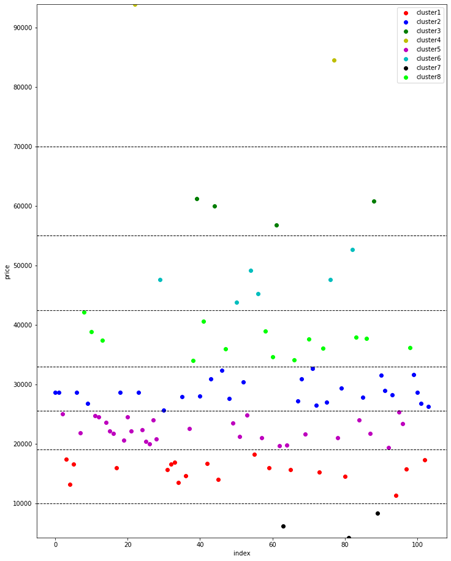

--------------------------------------------------
10000만원 미만 - 0
10000만원 이상 19000만원 미만 - 1
19000만원 이상 25500만원 미만 - 2
25500만원 이상 33000만원 미만 - 3
33000만원 이상 42500만원 미만 - 4
42500만원 이상 55000만원 미만 - 5
55000먼원 이상 70000만원 미만 - 6
70000만원 이상 - 7
-------------------------------------------------- 

원하는 가격대에 해당하는 숫자를 적어주세요. : 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


치안시설 수/음식점/교육/상업시설/병원/노인/버스에 대해 중요도를 1~6중 하나로 입력
예시 : 노인 1
치안시설 수: 4
음식점: 3
상업시설: 2
병원: 4
노인: 1
교육: 5
버스: 6

중요하다-2/있어야 한다-1/없어도 된다-0
문화시설: 0
지하철: 2
유치원: 1
초등학교: 0
중학교: 0
공원: 1
고등학교: 0


해당 가상의 동과 유사한 동은
거제동
광안동
구서동


해당 가상의 동과 가장 유사한 동인  거제동 을 기준으로 사용자 기반 추천 시스템을 적용한 결과는 

거제동
좌동
구서동


In [ ]:
d_list = find_similar_dong(df0, item_user_rating, 3)

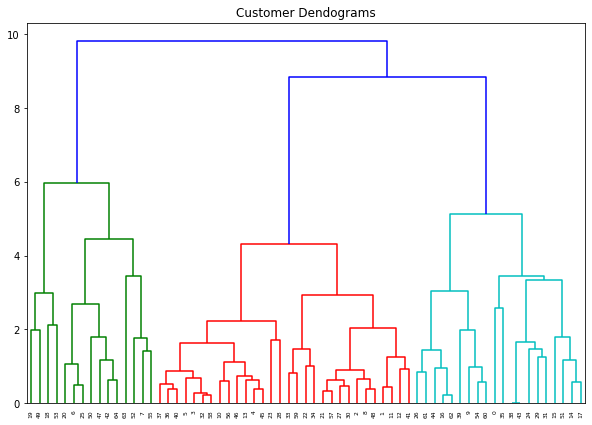

군집개수: 7


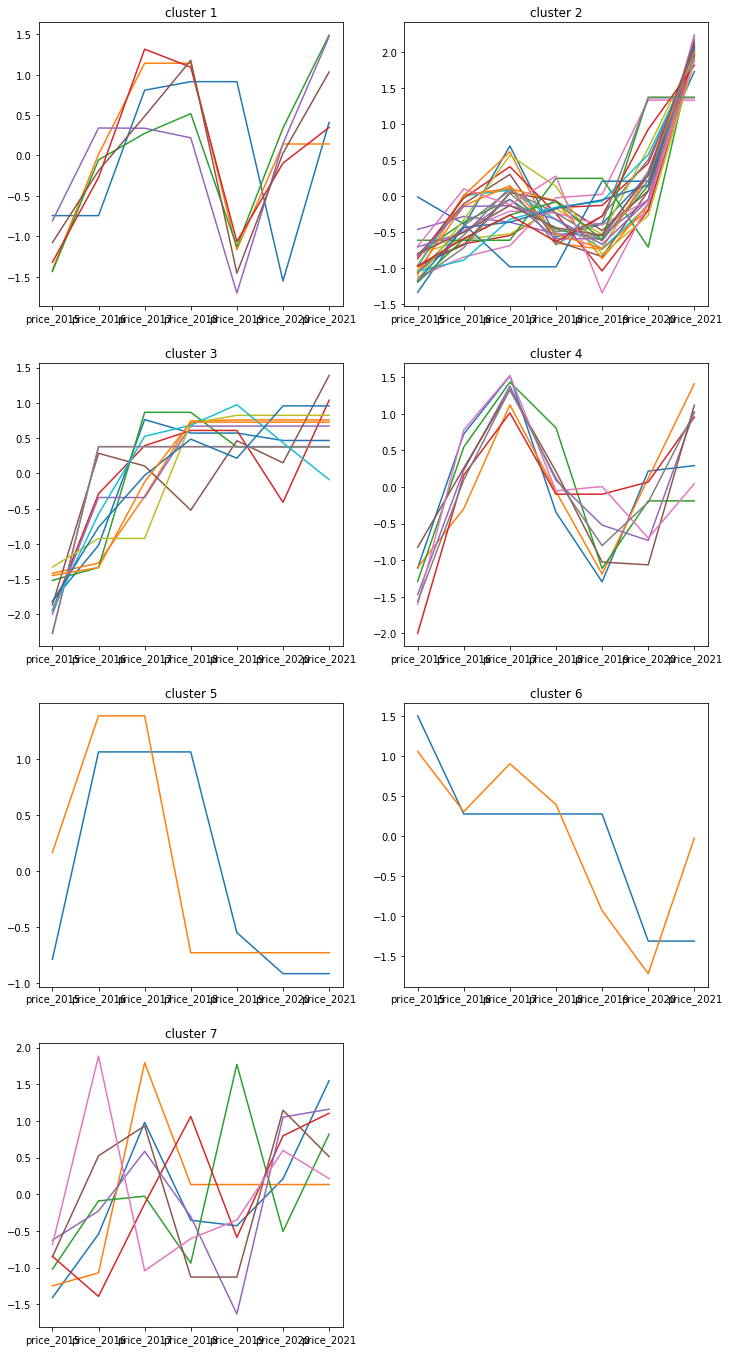

군집을 고르시오: 3
경동 의 2021년 평균 가격(단위:만원):	 18050.0
글로벌하임(934-2) 의 2021년 평균 가격(단위:만원):	 43450.0
글로벌하임빌(934) 의 2021년 평균 가격(단위:만원):	 31050.0
대호 의 2021년 평균 가격(단위:만원):	 23475.0
동성 의 2021년 평균 가격(단위:만원):	 17350.0
버드나무 의 2021년 평균 가격(단위:만원):	 13133.33333333333
아시아드힐 의 2021년 평균 가격(단위:만원):	 19116.66666666667
우성로얄 의 2021년 평균 가격(단위:만원):	 21300.0
원정파크 의 2021년 평균 가격(단위:만원):	 28383.33333333333
청마마이우스 의 2021년 평균 가격(단위:만원):	 9336.363636363636
화신거림(212-1) 의 2021년 평균 가격(단위:만원):	 27240.0
화신데파트 의 2021년 평균 가격(단위:만원):	 35477.0


In [ ]:
find_apart(aa, '거제동')

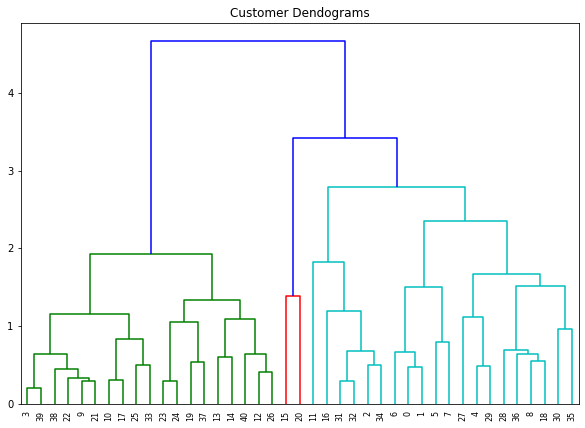

군집개수: 7


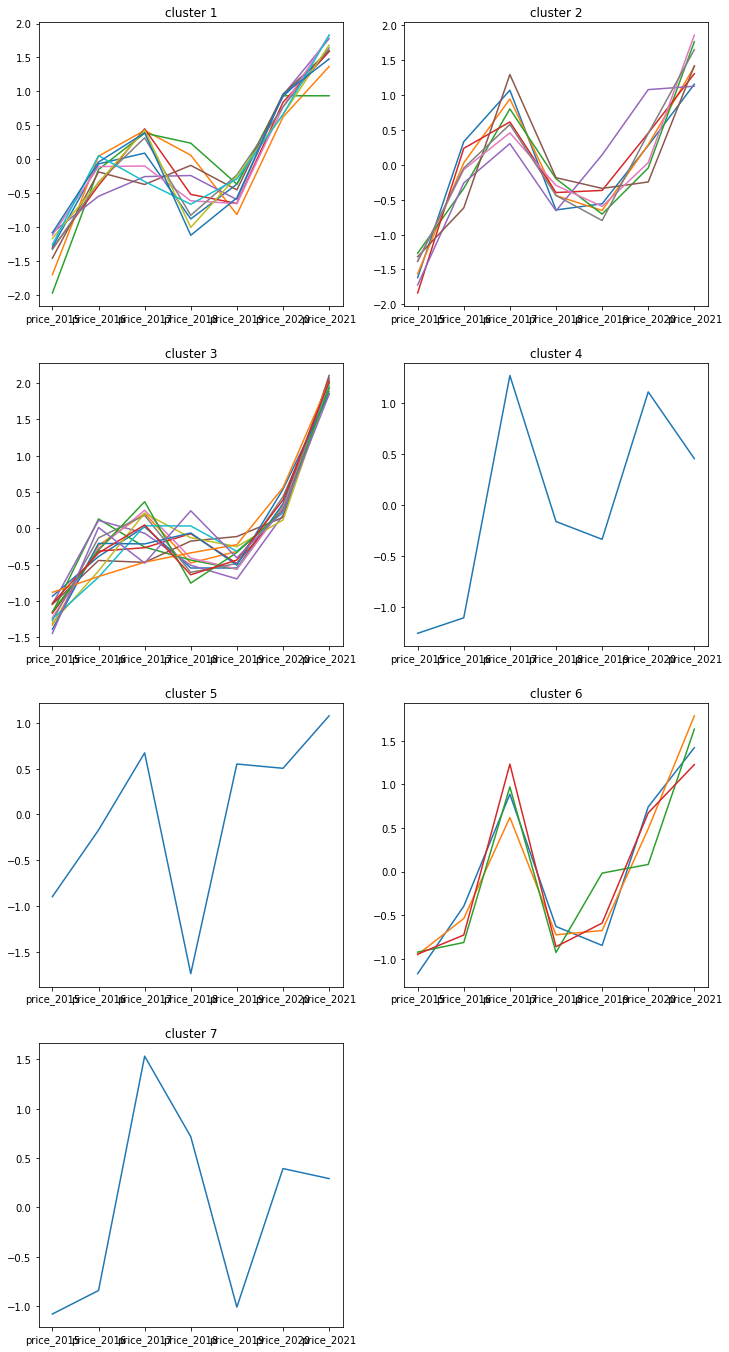

군집을 고르시오: 3
건영2 의 2021년 평균 가격(단위:만원):	 53900.0
대림 의 2021년 평균 가격(단위:만원):	 49248.48484848485
대림2 의 2021년 평균 가격(단위:만원):	 51076.92307692308
대우 의 2021년 평균 가격(단위:만원):	 50289.47368421053
동신 의 2021년 평균 가격(단위:만원):	 46683.33333333334
두산2 의 2021년 평균 가격(단위:만원):	 61243.33333333334
롯데3차 의 2021년 평균 가격(단위:만원):	 38694.73684210526
롯데4 의 2021년 평균 가격(단위:만원):	 39866.12903225807
롯데캐슬마스터 의 2021년 평균 가격(단위:만원):	 69225.0
벽산1 의 2021년 평균 가격(단위:만원):	 64583.33333333334
삼성 의 2021년 평균 가격(단위:만원):	 50404.16666666666
해운대케이씨씨스위첸 의 2021년 평균 가격(단위:만원):	 151166.6666666667
현대 의 2021년 평균 가격(단위:만원):	 47942.42424242424
화목 의 2021년 평균 가격(단위:만원):	 57852.94117647059
화목데파트 의 2021년 평균 가격(단위:만원):	 27233.33333333333


In [23]:
find_apart(aa, '좌동')

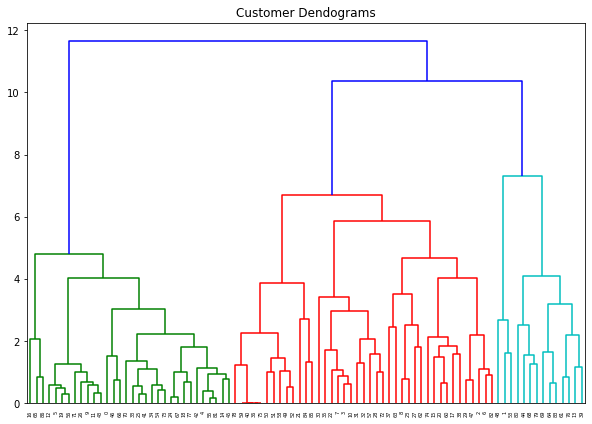

군집개수: 6


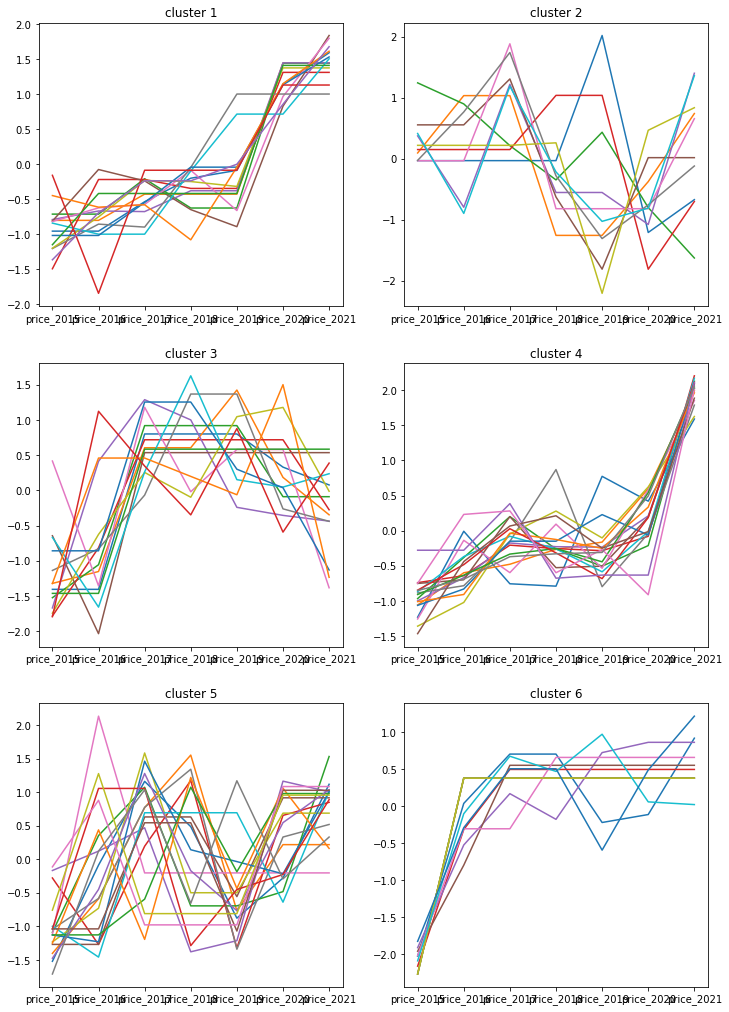

군집을 고르시오: 4
거북맨션 의 2021년 평균 가격(단위:만원):	 16750.0
고려 의 2021년 평균 가격(단위:만원):	 36640.0
구서 협성 엠파이어 의 2021년 평균 가격(단위:만원):	 47387.5
구서동 쌍용예가 2단지 의 2021년 평균 가격(단위:만원):	 113600.0
구서동롯데캐슬골드1단지(1051) 의 2021년 평균 가격(단위:만원):	 64287.5
구서동롯데캐슬골드2단지(1049) 의 2021년 평균 가격(단위:만원):	 78120.0
구서동하나로3 의 2021년 평균 가격(단위:만원):	 19925.0
구서신동아 의 2021년 평균 가격(단위:만원):	 33146.66666666666
구서쌍용스윗닷홈 의 2021년 평균 가격(단위:만원):	 44400.0
구서우성 의 2021년 평균 가격(단위:만원):	 32452.94117647059
대성파크 의 2021년 평균 가격(단위:만원):	 18322.0
산호 의 2021년 평균 가격(단위:만원):	 37750.0
선경2 의 2021년 평균 가격(단위:만원):	 72500.0
선경3 의 2021년 평균 가격(단위:만원):	 50700.0
신일 의 2021년 평균 가격(단위:만원):	 18200.0
일신 의 2021년 평균 가격(단위:만원):	 24000.0
진흥목화 의 2021년 평균 가격(단위:만원):	 33300.0
한일 의 2021년 평균 가격(단위:만원):	 33166.66666666666


In [24]:
find_apart(aa, '구서동')